In [3]:
#Mital Patil 
#Internship Task1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('netflix_titles.csv')


In [4]:
#count for  the  missing values - first step to identifying how many missing values in dataset 
print(df.isnull().sum())


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [5]:
# Fill missing - after identifying now its needed to fill the missing value.
df['director'].fillna('No Director', inplace=True)
df['cast'].fillna('No Cast', inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df['duration'].fillna(df['duration'].mode()[0], inplace=True)

In [6]:
# Remove duplicate 
df.drop_duplicates(inplace=True)


In [7]:
#Here you can see all missing values are removed
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [8]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'])


In [9]:
type_counts = df['type'].value_counts()
print(type_counts)


Movie      6131
TV Show    2676
Name: type, dtype: int64


In [10]:
# Extract numeric duration
df['duration_int'] = df['duration'].str.extract('(\d+)').astype(int)

# Calculate average duration
average_duration = df['duration_int'].mean()
print(f'Average Duration: {average_duration}')


Average Duration: 69.82343590325877


In [11]:
# Count the number of titles by country
country_counts = df['country'].value_counts().head(10)
print(country_counts)


United States     3649
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64


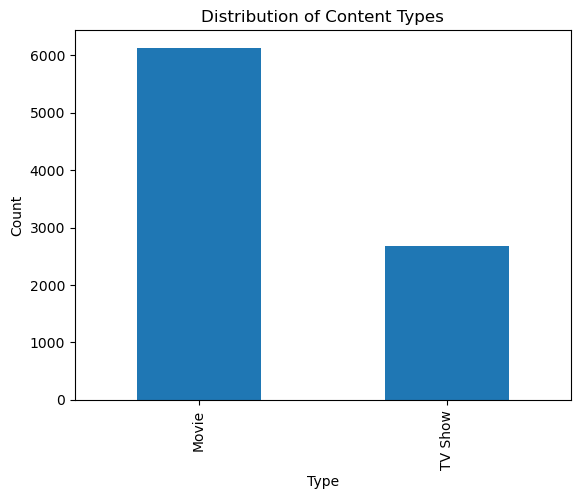

In [12]:
# 1
type_counts.plot(kind='bar', title='Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


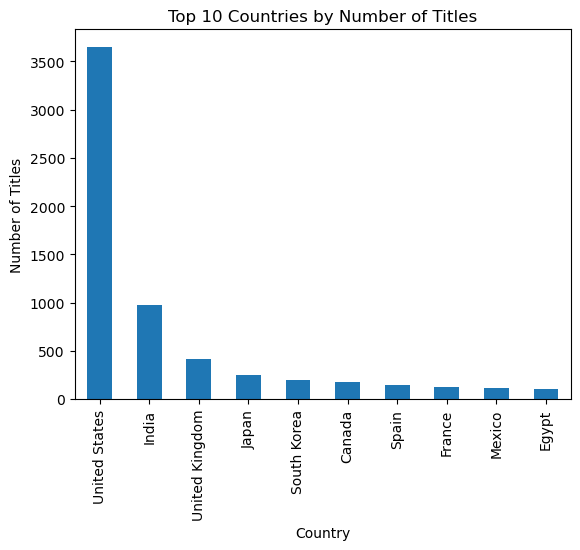

In [13]:
# 2
country_counts.plot(kind='bar', title='Top 10 Countries by Number of Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()


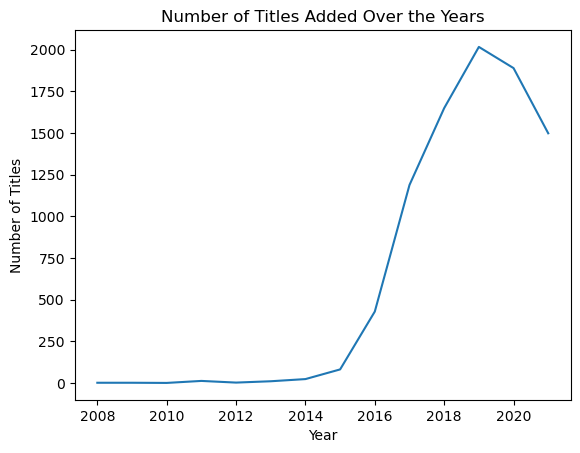

In [14]:
#3
df['year_added'] = df['date_added'].dt.year
year_counts = df['year_added'].value_counts().sort_index()

# Plot 
year_counts.plot(kind='line', title='Number of Titles Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


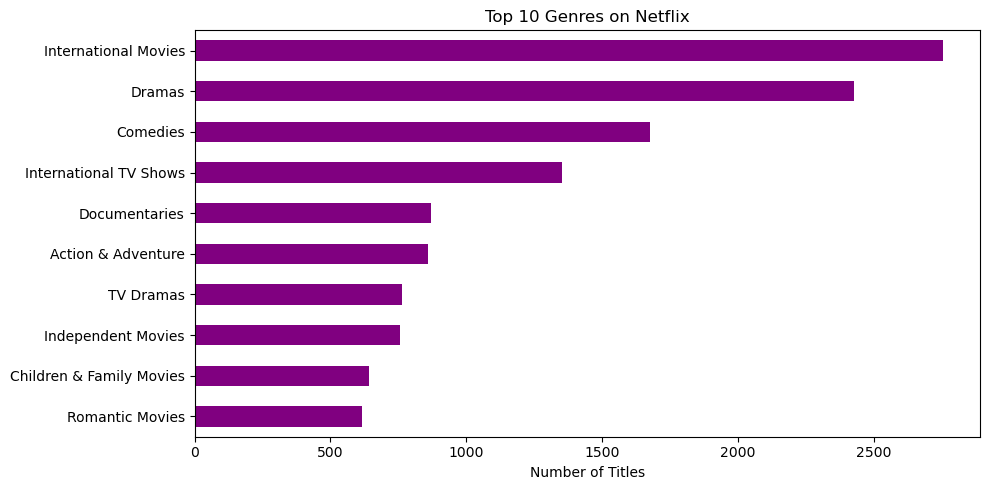

In [15]:
#4
# Split genres and count frequencies
from collections import Counter

genre_series = df['listed_in'].dropna().apply(lambda x: [genre.strip() for genre in x.split(',')])
all_genres = sum(genre_series, [])
genre_counts = pd.Series(Counter(all_genres)).sort_values(ascending=False).head(10)

# Bar chart
plt.figure(figsize=(10, 5))
genre_counts.plot(kind='barh', color='purple')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


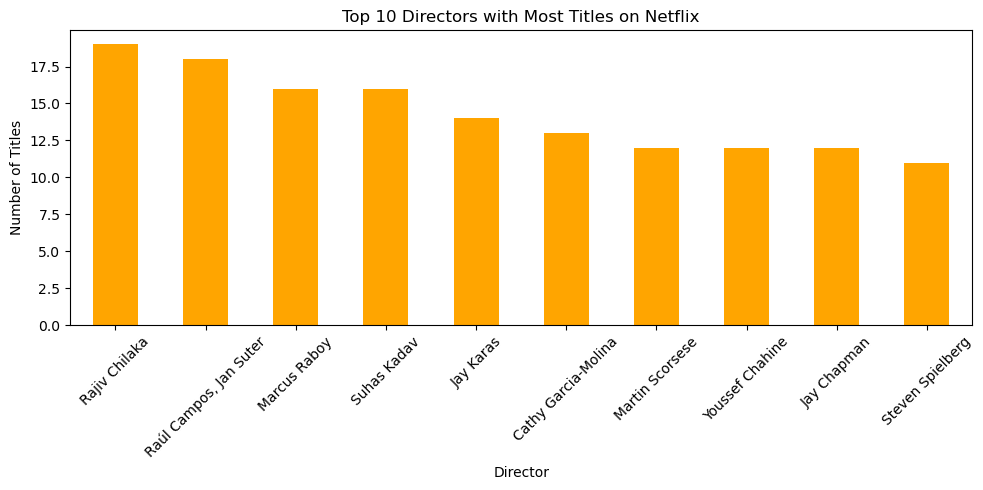

In [16]:
#5
top_directors = df[df['director'] != 'No Director']['director'].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_directors.plot(kind='bar', color='orange')
plt.title('Top 10 Directors with Most Titles on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


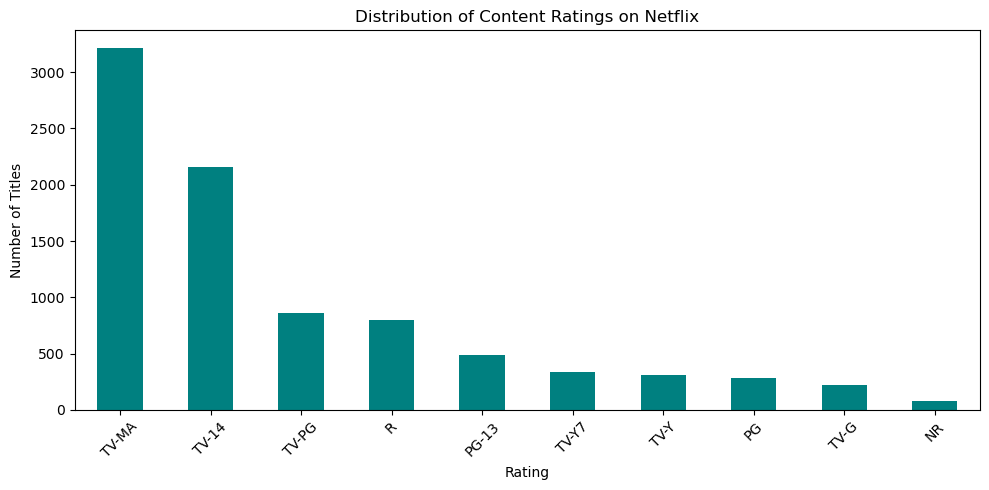

In [17]:
#6
plt.figure(figsize=(10, 5))
df['rating'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


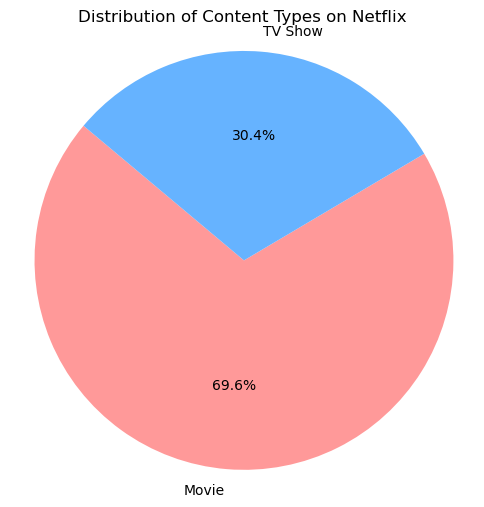

In [18]:
# 7 . Pie chart  Count of Movies and TV Shows
type_counts = df['type'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=140)
plt.title('Distribution of Content Types on Netflix')
plt.axis('equal')  
plt.show()
